In [ ]:
# Color spaces for segmentation 

## Practice!!!  Do it Yourself!!!  

Step 1 :   
- Get the color values for a particular color
- Find the approximate range of values of the color for each color space.   
- For doing this, You've made an interactive GUI where you can check the values of all the color spaces for each pixel just by hovering the mouse on the image as shown below :
- For example to the green color, below figure shows a pixel and its value in different color spaces for the green color image.

<img src = '../images/2cube_pxls.png' width=400 height=400>

Step 2 :   
- Applying threshold for segmentation  
- Extract all pixels from the image which have values close to that of the color pixel.   
- Take a range of +/- 40 for each color space and check how the results look like (You can change the the range)   
- Use the opencv function inRange for finding the mask of green pixels and then use bitwise_and operation to get the color pixels from the image using the mask.
- Note that for converting one pixel to another color space, you first need to convert 1D array to a 3D array.  

Use the following example code and understand how it works:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

cubic_BGR = cv2.imread('./images/cubic.png')

cubic_RGB = cv2.cvtColor(cubic_BGR, cv2.COLOR_BGR2RGB)
# print('cubic_RGB = ', cubic_RGB)

cubic_LAB = cv2.cvtColor(cubic_BGR, cv2.COLOR_BGR2LAB)
# print('cubic_LAB = ', cubic_LAB)

cubic_YCB = cv2.cvtColor(cubic_BGR, cv2.COLOR_BGR2YCrCb)
# print('cubic_YCB = ', cubic_YCB)

cubic_HSV = cv2.cvtColor(cubic_BGR, cv2.COLOR_BGR2HSV)
# print('cubic_HSV = ', cubic_HSV)

bgr = [40, 158, 16]
thresh = 40
 
minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])
 
maskBGR = cv2.inRange(cubic_BGR,minBGR,maxBGR)
resultBGR = cv2.bitwise_and(cubic_BGR, cubic_BGR, mask = maskBGR)
# cv2.imshow("resultLAB", resultLAB)
# cv2.waitKey()
# cv2.destroyAllWindows()

# plt.imshow(resultLAB), plt.title('resultLAB')
# plt.show()

#convert 1D array to 3D, then convert it to HSV and take the first element
# this will be same as the hsv [65, 229, 158] value in the first figure 
hsv = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2HSV)[0][0]
 
minHSV = np.array([hsv[0] - thresh, hsv[1] - thresh, hsv[2] - thresh])
maxHSV = np.array([hsv[0] + thresh, hsv[1] + thresh, hsv[2] + thresh])
 
maskHSV = cv2.inRange(cubic_HSV, minHSV, maxHSV)
resultHSV = cv2.bitwise_and(cubic_HSV, cubic_HSV, mask = maskHSV)
# cv2.imshow("resultHSV", resultHSV)
# cv2.waitKey()
# cv2.destroyAllWindows()

# plt.imshow(resultHSV), plt.title('resultHSV')
# plt.show()

#convert 1D array to 3D, then convert it to YCrCb and take the first element
ycb = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2YCrCb)[0][0]
 
minYCB = np.array([ycb[0] - thresh, ycb[1] - thresh, ycb[2] - thresh])
maxYCB = np.array([ycb[0] + thresh, ycb[1] + thresh, ycb[2] + thresh])
 
maskYCB = cv2.inRange(cubic_YCB, minYCB, maxYCB)
resultYCB = cv2.bitwise_and(cubic_YCB, cubic_YCB, mask = maskYCB)
# cv2.imshow("resultYCB", resultYCB)
# cv2.waitKey()
# cv2.destroyAllWindows()

# plt.imshow(resultYCB), plt.title('resultYCB')
# plt.show()

#convert 1D array to 3D, then convert it to LAB and take the first element
lab = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2LAB)[0][0]
 
minLAB = np.array([lab[0] - thresh, lab[1] - thresh, lab[2] - thresh])
maxLAB = np.array([lab[0] + thresh, lab[1] + thresh, lab[2] + thresh])
 
maskLAB = cv2.inRange(cubic_LAB, minLAB, maxLAB)
resultLAB = cv2.bitwise_and(cubic_LAB, cubic_LAB, mask = maskLAB) 

# cv2.imshow("resultLAB", resultLAB)
# cv2.waitKey()
# cv2.destroyAllWindows()

# plt.imshow(resultLAB), plt.title('resultLAB')
# plt.show()

cv2.imshow("Result BGR", resultBGR)
cv2.imshow("Result HSV", resultHSV)
cv2.imshow("Result YCB", resultYCB)
cv2.imshow("Output LAB", resultLAB)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\highgui\src\window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


The example below is the code for extracting by color.  
- cv2.inRange(hsv, lower, upper) : Among all values in hsv, those between the lower and upper ranges are converted to 255, and the remaining values are converted to 0.  

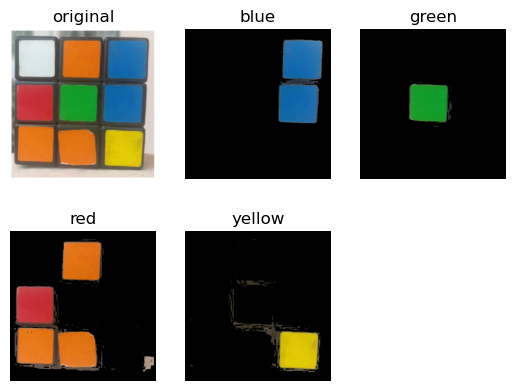

In [2]:
# hsv_color_mask.py

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread("./images/cubic.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

blue1 = np.array([90, 50, 50])   # define color range 
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

mask_blue = cv2.inRange(hsv, blue1, blue2) # define mask
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

res_blue = cv2.bitwise_and(img, img, mask=mask_blue) # extract defined masked - color
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

imgs = {'original':img, 'blue':res_blue, 'green':res_green, 'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.axis('off')
plt.show()